In [49]:
import pandas as pd

## Data Pre-processing

In [50]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [51]:
X=df.drop("koi_disposition", axis=1)
y=df["koi_disposition"]
print(X.shape, y.shape)

(8744, 40) (8744,)


In [52]:
#Create a train test split
#Use koi_disposition for the y values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
# Scale data with minmaxscaler

from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

## Train the Support Vector Machine

In [54]:
from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [55]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.8584934431229033
Testing Data Score: 0.8522415370539799


## Hyperparameter Tuning for Support Vector Machines

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [56]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
  {'C': [1, 5, 10, 50, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 5, 10, 50, 100, 1000], 'gamma': [0.0001, 0.0005, 0.001, 0.005], 'kernel': ['rbf']},
]


grid = GridSearchCV(estimator=svm.SVC(),param_grid=param_grid, verbose=3)
grid.fit(X_train_scaled, y_train)


/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.839, total=   0.5s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.858, total=   0.5s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.857, total=   0.5s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.861, total=   0.5s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.874, total=   0.5s
[CV] C=5, kernel=linear ..............................................
[CV] .................. C=5, kernel=linear, score=0.871, total=   0.5s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.867, total=   0.6s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.880, total=   0.5s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.872, total=   0.6s
[CV] C=50, kernel=linear .............................................
[CV] .

[CV] ....... C=50, gamma=0.001, kernel=rbf, score=0.810, total=   0.8s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.001, kernel=rbf, score=0.823, total=   1.0s
[CV] C=50, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.001, kernel=rbf, score=0.814, total=   0.8s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.005, kernel=rbf, score=0.829, total=   0.8s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.005, kernel=rbf, score=0.849, total=   0.9s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] ....... C=50, gamma=0.005, kernel=rbf, score=0.846, total=   0.9s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.761, total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 50, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 5, 10, 50, 100, 1000],
                          'gamma': [0.0001, 0.0005, 0.001, 0.005],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [57]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1000, 'kernel': 'linear'}
0.8880756328148826


In [58]:
predictions = grid.predict(X_test_scaled)
grid.score(X_test_scaled, y_test)

0.889295516925892

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.85      0.69      0.77       533
     CONFIRMED       0.75      0.86      0.80       550
FALSE POSITIVE       0.98      1.00      0.99      1103

      accuracy                           0.89      2186
     macro avg       0.86      0.85      0.85      2186
  weighted avg       0.89      0.89      0.89      2186



In [60]:
print(grid.best_estimator_)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## K Nearest Neighbors

In [61]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.801
k: 3, Train/Test Score: 0.901/0.817
k: 5, Train/Test Score: 0.874/0.820
k: 7, Train/Test Score: 0.866/0.825
k: 9, Train/Test Score: 0.858/0.828
k: 11, Train/Test Score: 0.851/0.829
k: 13, Train/Test Score: 0.846/0.823
k: 15, Train/Test Score: 0.848/0.823
k: 17, Train/Test Score: 0.845/0.824
k: 19, Train/Test Score: 0.842/0.825


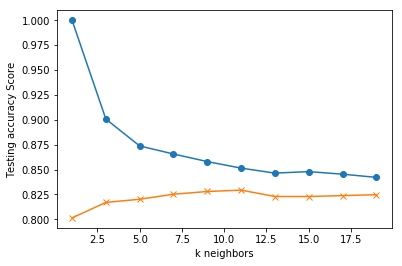

In [62]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Accuracy: 0.823


## Hyperparameter Tuning for Random Forest Classifier

In [64]:
#Decision Tree Classifier

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

print(f"Decision Tree Classifier Score: {clf.score(X_test, y_test)}")

Decision Tree Classifier Score: 0.8517840805123513


In [65]:
#Random Forest Classifier with tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

rfc = RandomForestClassifier()
param_grid = [
    {'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]},
    {'max_features':['auto','sqrt']}
]

grid = GridSearchCV(estimator =rfc, param_grid=param_grid, verbose =3)
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] n_estimators=200 ................................................


/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=200, score=0.895, total=   2.5s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.894, total=   2.4s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.894, total=   2.5s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.895, total=   4.9s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.896, total=   4.9s
[CV] n_estimators=400 ................................................
[CV] .................... n_estimators=400, score=0.898, total=   5.2s
[CV] n_estimators=600 ................................................
[CV] .................... n_estimators=600, score=0.895, total=   7.6s
[CV] n_estimators=600 ................................................
[CV] .................... n_estimators=600, score=0.893, total=   8.1s
[CV] n_estimators=600 ................................................
[CV] .................... n_estimators=600, score=0.896, total=   7.9s
[CV] n_estimators=800 ................................................
[CV] .

/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] ................... max_features=auto, score=0.888, total=   0.1s
[CV] max_features=auto ...............................................
[CV] ................... max_features=auto, score=0.875, total=   0.1s
[CV] max_features=sqrt ...............................................


/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] ................... max_features=sqrt, score=0.880, total=   0.1s
[CV] max_features=sqrt ...............................................
[CV] ................... max_features=sqrt, score=0.875, total=   0.1s
[CV] max_features=sqrt ...............................................


/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tinahuang/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] ................... max_features=sqrt, score=0.885, total=   0.1s


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  7.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [66]:
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 400}
0.8961573650503202


In [67]:
print(f"Random Forest Classifier Score: {grid.score(X_test_scaled, y_test)}")

Random Forest Classifier Score: 0.8906678865507777
